In [1]:
#Import the dataset and print the first 20 rows
import pandas as pd
covid_data= pd.read_csv('03-17-2020.csv')
covid_data.head(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515
5,NaN,"Korea, South",2020-03-17T10:33:03,8320,81,1407,35.9078,127.7669
6,France,France,2020-03-17T19:13:08,7652,148,12,46.2276,2.2137
7,NaN,Switzerland,2020-03-17T16:33:04,2700,27,4,46.8182,8.2275
8,United Kingdom,United Kingdom,2020-03-17T15:13:09,1950,55,52,55.3781,-3.4360
9,New York,US,2020-03-17T22:53:03,1706,13,0,42.1657,-74.9481


In [2]:
#Import the dataset and print the last 20 rows
covid_data.tail(20)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude
256,NaN,Liberia,2020-03-17T12:13:16,1,0,0,6.4281,-9.4295
257,NaN,Mauritania,2020-03-15T18:20:19,1,0,0,21.0079,-10.9408
258,NaN,Mayotte,2020-03-16T14:38:45,1,0,0,-12.8275,45.1662
259,NaN,Nepal,2020-03-13T22:22:03,1,0,1,28.3949,84.1240
260,NaN,Saint Vincent and the Grenadines,2020-03-14T16:33:03,1,0,0,12.9843,-61.2872
261,NaN,Somalia,2020-03-16T14:38:46,1,0,0,5.1521,46.1996
262,NaN,Sudan,2020-03-14T01:13:32,1,1,0,12.8628,30.2176
263,NaN,Suriname,2020-03-14T16:33:03,1,0,0,3.9193,-56.0278
264,NaN,Tanzania,2020-03-17T01:33:03,1,0,0,-6.3690,34.8888
265,NaN,The Bahamas,2020-03-16T03:33:03,1,0,0,24.2500,-76.0000


In [3]:
#Use the function describe to get some information
print(covid_data.describe())

          Confirmed       Deaths     Recovered    Latitude   Longitude
count    276.000000   276.000000    276.000000  276.000000  276.000000
mean     714.376812    28.641304    292.898551   26.761055    4.273018
std     4710.730292   248.763367   3391.772577   22.879848   80.561775
min        0.000000     0.000000      0.000000  -41.454500 -157.498300
25%        7.000000     0.000000      0.000000   13.444300  -71.548225
50%       37.000000     0.000000      0.000000   33.476500    9.777700
75%      161.250000     1.000000      4.250000   42.530375   65.169900
max    67799.000000  3111.000000  56003.000000   71.706900  174.886000


In [4]:
#Use the function describe() to get some information on the "Confirmed" column
covid_data[['Confirmed']].describe()

,Confirmed
count,276.000000
mean,714.376812
std,4710.730292
min,0.000000
25%,7.000000
50%,37.000000
75%,161.250000
max,67799.000000


In [5]:
#Create a new DataFrame that has only the Chinese province withe the cases of confirmed, deaths and recovered
c_data = covid_data[covid_data['Country/Region']=='China']
c_data = c_data[['Province/State', 'Confirmed', 'Deaths', 'Recovered']].reset_index(drop=True)
print(c_data)

    Province/State  Confirmed  Deaths  Recovered
0            Hubei      67799    3111      56003
1        Guangdong       1364       8       1307
2            Henan       1273      22       1250
3         Zhejiang       1232       1       1216
4            Hunan       1018       4       1014
5            Anhui        990       6        984
6          Jiangxi        935       1        934
7         Shandong        761       7        746
8          Jiangsu        631       0        631
9        Chongqing        576       6        570
10         Sichuan        540       3        520
11    Heilongjiang        482      13        456
12         Beijing        456       8        369
13        Shanghai        358       3        325
14           Hebei        318       6        310
15          Fujian        296       1        295
16         Guangxi        253       2        248
17         Shaanxi        246       3        236
18          Yunnan        176       2        172
19          Hainan  

In [6]:
# Create a new column for the active cases with the name "active"
covid_data['Active'] = covid_data['Confirmed'] - covid_data['Deaths'] - covid_data['Recovered']
pd.set_option('display.max_rows', None)
covid_data

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Latitude,Longitude,Active
0,Hubei,China,2020-03-17T11:53:10,67799,3111,56003,30.9756,112.2707,8685
1,NaN,Italy,2020-03-17T18:33:02,31506,2503,2941,41.8719,12.5674,26062
2,NaN,Iran,2020-03-17T15:13:09,16169,988,5389,32.4279,53.6880,9792
3,NaN,Spain,2020-03-17T20:53:02,11748,533,1028,40.4637,-3.7492,10187
4,NaN,Germany,2020-03-17T18:53:02,9257,24,67,51.1657,10.4515,9166
5,NaN,"Korea, South",2020-03-17T10:33:03,8320,81,1407,35.9078,127.7669,6832
6,France,France,2020-03-17T19:13:08,7652,148,12,46.2276,2.2137,7492
7,NaN,Switzerland,2020-03-17T16:33:04,2700,27,4,46.8182,8.2275,2669
8,United Kingdom,United Kingdom,2020-03-17T15:13:09,1950,55,52,55.3781,-3.4360,1843
9,New York,US,2020-03-17T22:53:03,1706,13,0,42.1657,-74.9481,1693


In [7]:
#Create a new DataFrame with the following rows: Country/Region, Confirmed, Recovered, Active. use groupby function and sum() to get rid of Province/State column
result = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered', 'Active'].sum()
print(result)

                                  Confirmed  Deaths  Recovered  Active
Country/Region                                                        
Afghanistan                              22       0          1      21
Albania                                  55       1          0      54
Algeria                                  60       4         12      44
Andorra                                  39       0          1      38
Antigua and Barbuda                       1       0          0       1
Argentina                                68       2          3      63
Armenia                                  78       0          1      77
Aruba                                     3       0          0       3
Australia                               452       5         23     424
Austria                                1332       3          1    1328
Azerbaijan                               28       1          6      21
Bahrain                                 228       1         81     146
Bangla

In [8]:
#Write a Python program to get the latest number of confirmed, deaths and recovered people of Novel Coronavirus (COVID-19) 
data = covid_data.groupby(['Country/Region', 'Province/State'])['Confirmed', 'Deaths', 'Recovered'].sum()
print(data)

                                             Confirmed  Deaths  Recovered
Country/Region Province/State                                            
Australia      Australian Capital Territory          2       0          0
               From Diamond Princess                 0       0          0
               New South Wales                     210       4          4
               Northern Territory                    1       0          0
               Queensland                           78       0          8
               South Australia                      29       0          3
               Tasmania                              7       0          0
               Victoria                             94       0          8
               Western Australia                    31       1          0
Canada         Alberta                              74       0          0
               British Columbia                    103       4          4
               Grand Princess         

In [9]:
#show the countries which only them have deaths cases.
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Deaths']>0][['Country/Region', 'Deaths']].reset_index(drop=True)
print(result)

        Country/Region  Deaths
0              Albania       1
1              Algeria       4
2            Argentina       2
3            Australia       5
4              Austria       3
5           Azerbaijan       1
6              Bahrain       1
7              Belgium      10
8               Brazil       1
9             Bulgaria       2
10              Canada       5
11               China    3230
12         Cruise Ship       7
13             Denmark       4
14  Dominican Republic       1
15             Ecuador       2
16               Egypt       4
17              France     148
18             Germany      24
19              Greece       5
20           Guatemala       1
21              Guyana       1
22             Hungary       1
23             Iceland       1
24               India       3
25           Indonesia       5
26                Iran     988
27                Iraq      11
28             Ireland       2
29               Italy    2503
30               Japan      29
31      

In [10]:
#Write a Python program to list countries with no cases of Novel Coronavirus (COVID-19) recovered.
data = covid_data.groupby('Country/Region')['Confirmed', 'Deaths', 'Recovered'].sum().reset_index()
result = data[data['Recovered']==0][['Country/Region', 'Confirmed', 'Deaths', 'Recovered']]
print(result)

                       Country/Region  Confirmed  Deaths  Recovered
1                             Albania         55       1          0
4                 Antigua and Barbuda          1       0          0
7                               Aruba          3       0          0
13                           Barbados          2       0          0
16                              Benin          1       0          0
17                             Bhutan          1       0          0
18                            Bolivia         11       0          0
21                             Brunei         56       0          0
22                           Bulgaria         67       2          0
23                       Burkina Faso         15       0          0
25                           Cameroon         10       0          0
27           Central African Republic          1       0          0
28                              Chile        201       0          0
31                Congo (Brazzaville)          1

In [11]:
#get the top 10 countries by confirmed cases. Columns needed (Country/Region, Confirmed, Deaths, Recovered)
result = covid_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()
result=result.sort_values(by='Confirmed', ascending=False)[:10]
print(result)

                Confirmed  Deaths  Recovered
Country/Region                              
China               81058    3230      68798
Italy               31506    2503       2941
Iran                16169     988       5389
Spain               11748     533       1028
Germany              9257      24         67
Korea, South         8320      81       1407
France               7683     148         12
US                   6421     108         17
Switzerland          2700      27          4
United Kingdom       1960      56         53


In [12]:
#visualize the state/province wise Confirmed cases of Novel Coronavirus (COVID-19) in USA.
import matplotlib.pyplot as plt
us_data = covid_data[covid_data['Country/Region']=='US']
us_data=us_data[['Province/State','Confirmed']].reset_index(drop=True)
ax = us_data.plot(x='Province/State', y='Confirmed', kind='bar', figsize=(20,8),fontsize=20)
ax.set_xlabel("States",fontsize=20,color='blue')
ax.set_ylabel("Number of Confirmed Cases",fontsize=20,color='red')
plt.suptitle('Number of Confirmed COVID-19 Cases in the US', fontsize=30,color="green")
plt.ylim(0,1800)
plt.show()

<Figure size 2000x800 with 1 Axes>

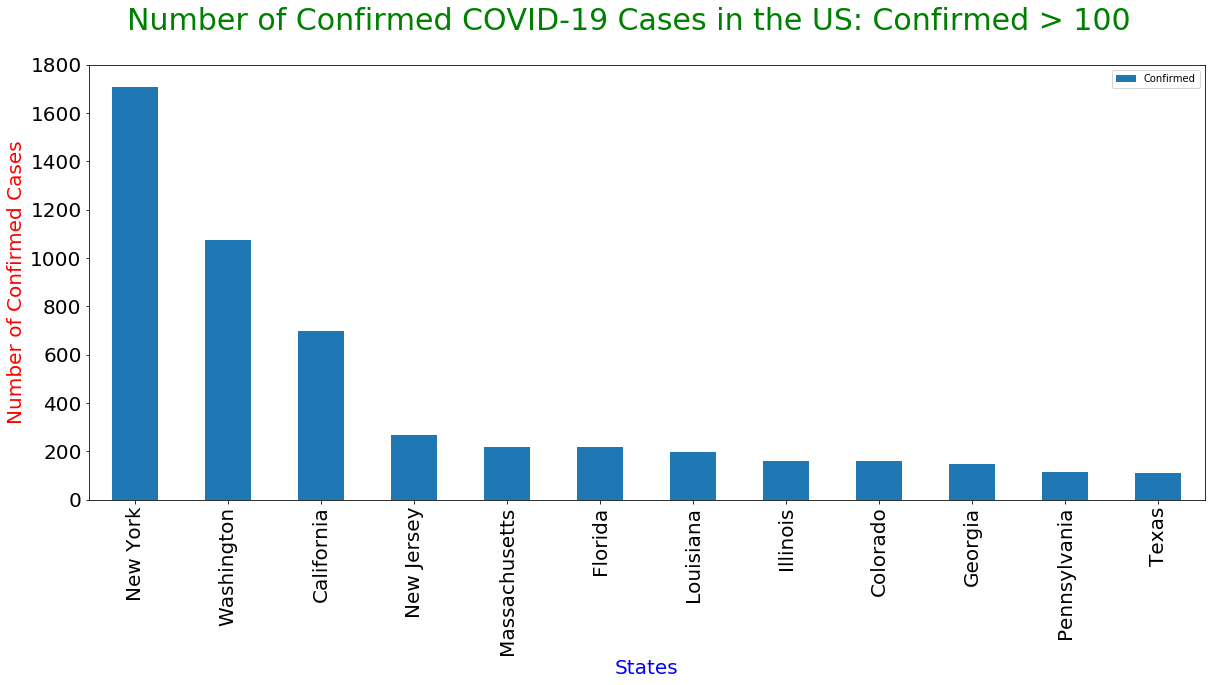

In [13]:
#visualize the state/province wise Confirmed cases of Novel Coronavirus (COVID-19) in USA. >100
import matplotlib.pyplot as plt
us_data = covid_data[covid_data['Country/Region']=='US']
us_data=us_data[['Province/State','Confirmed']].reset_index(drop=True)
us_data=us_data[us_data['Confirmed']>100]
ax = us_data.plot(x='Province/State', y='Confirmed', kind='bar', figsize=(20,8),fontsize=20)
ax.set_xlabel("States",fontsize=20,color='blue')
ax.set_ylabel("Number of Confirmed Cases",fontsize=20,color='red')
plt.suptitle('Number of Confirmed COVID-19 Cases in the US: Confirmed > 100', fontsize=30,color="green")
plt.ylim(0,1800)
plt.show()



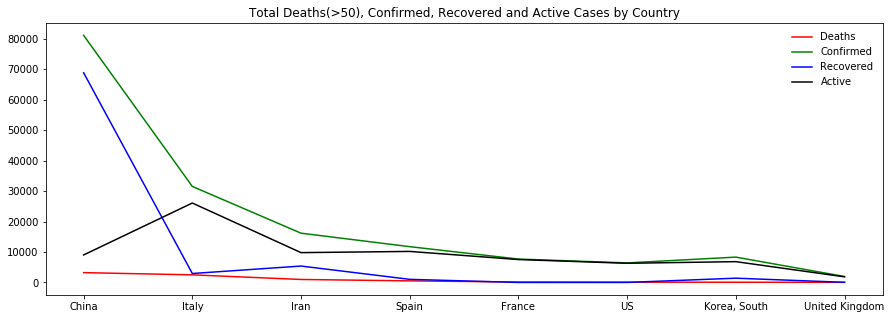

In [14]:
#create a plot (lines) of total deaths, confirmed, recovered and active cases Country wise where deaths greater than 150.
import matplotlib.pyplot as plt
r_data = covid_data.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
r_data = r_data.sort_values(by='Deaths', ascending=False)
r_data = r_data[r_data['Deaths']>50]
plt.figure(figsize=(15, 5))
plt.plot(r_data['Country/Region'], r_data['Deaths'],color='red',label='Deaths')
plt.plot(r_data['Country/Region'], r_data['Confirmed'],color='green',label='Confirmed')
plt.plot(r_data['Country/Region'], r_data['Recovered'], color='blue',label='Recovered')
plt.plot(r_data['Country/Region'], r_data['Active'], color='black',label='Active')
plt.legend(loc='upper right', frameon=False) 
plt.title('Total Deaths(>50), Confirmed, Recovered and Active Cases by Country')
plt.show()